In [1]:
from google.colab import files
uploaded=files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.shape

(200, 5)

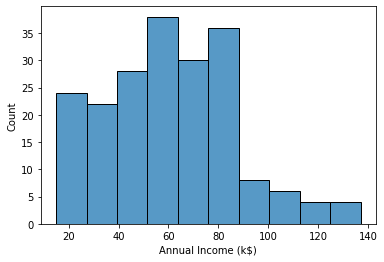

In [7]:
sns.histplot(df['Annual Income (k$)'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


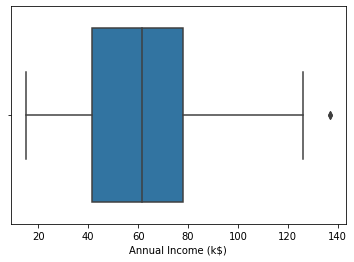

In [8]:
sns.boxplot(df['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


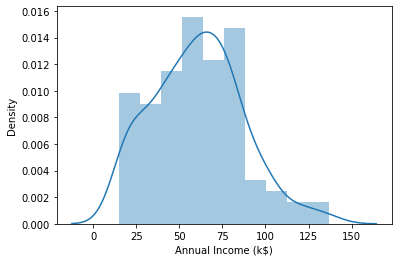

In [9]:
sns.distplot(df['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


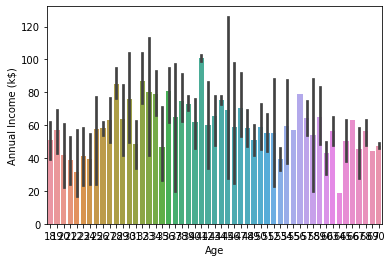

In [10]:
sns.barplot(df['Age'],df['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


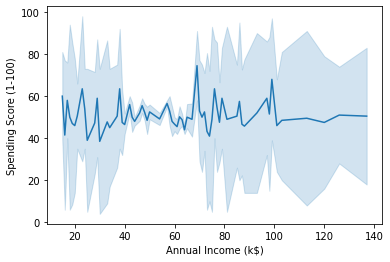

In [11]:
sns.lineplot(df['Annual Income (k$)'], df['Spending Score (1-100)'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


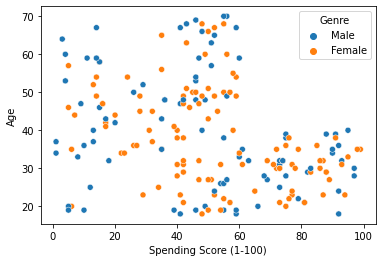

In [13]:
sns.scatterplot(df['Spending Score (1-100)'],df['Age'],hue =df['Genre'])


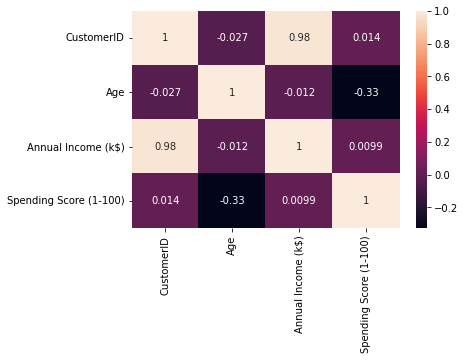

In [14]:
sns.heatmap(df.corr(),annot=True)


In [15]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
df.drop('CustomerID',axis=1,inplace=True)
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [17]:
df.isnull().any()

Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


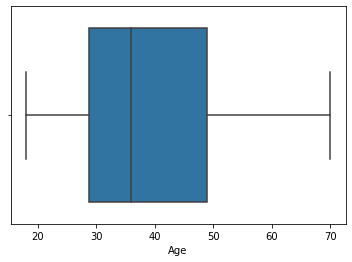

In [18]:
sns.boxplot(df['Age'])


In [19]:
from sklearn.preprocessing import LabelEncoder
l_en = LabelEncoder()

In [20]:
df['Genre'] = l_en.fit_transform(df['Genre'])
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)
data_scaled[0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918]])

In [22]:
from sklearn.cluster import KMeans
km = KMeans()
res = km.fit_predict(data_scaled)
res

array([5, 5, 1, 1, 1, 1, 3, 1, 6, 1, 6, 1, 3, 1, 2, 5, 1, 5, 6, 1, 5, 5,
       3, 5, 3, 5, 3, 5, 3, 1, 6, 1, 6, 5, 3, 1, 3, 1, 3, 1, 3, 5, 6, 1,
       3, 1, 3, 1, 1, 1, 3, 5, 1, 6, 3, 6, 3, 6, 1, 6, 6, 5, 3, 3, 6, 5,
       3, 3, 5, 1, 6, 3, 3, 3, 6, 5, 3, 5, 1, 3, 6, 5, 6, 3, 1, 6, 3, 1,
       1, 3, 3, 5, 6, 3, 1, 5, 3, 1, 6, 5, 1, 3, 6, 5, 6, 1, 3, 6, 6, 6,
       6, 1, 3, 5, 1, 1, 3, 3, 3, 3, 5, 3, 4, 0, 1, 4, 2, 0, 6, 0, 2, 0,
       1, 4, 2, 4, 7, 0, 2, 4, 7, 0, 1, 4, 2, 0, 2, 4, 7, 0, 2, 0, 7, 4,
       7, 4, 2, 4, 2, 4, 3, 4, 2, 4, 2, 4, 2, 4, 7, 0, 2, 0, 2, 0, 7, 4,
       2, 0, 2, 0, 7, 4, 2, 4, 7, 0, 7, 0, 7, 4, 7, 4, 2, 4, 7, 4, 7, 0,
       2, 0], dtype=int32)

In [23]:
data1 = pd.DataFrame(data_scaled, columns = df.columns)
data1.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


In [24]:
data1['kclus']  = pd.Series(res)
data1.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),kclus
0,1.0,0.019231,0.000000,0.387755,5
1,1.0,0.057692,0.000000,0.816327,5
2,0.0,0.038462,0.008197,0.051020,1
3,0.0,0.096154,0.008197,0.775510,1
4,0.0,0.250000,0.016393,0.397959,1


In [25]:
data1['kclus'].unique()

array([5, 1, 3, 6, 2, 4, 0, 7], dtype=int32)

In [26]:
data1['kclus'].value_counts()

3    39
1    37
6    26
5    24
4    22
2    20
0    18
7    14
Name: kclus, dtype: int64

In [27]:
ind = data1.iloc[:,0:4]
ind.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008197,0.051020
3,0.0,0.096154,0.008197,0.775510
4,0.0,0.250000,0.016393,0.397959


In [28]:
dep = data1.iloc[:,4:]
dep.head()

,kclus
0,5
1,5
2,1
3,1
4,1


In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ind,dep,test_size=0.3,random_state=1)
x_train.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
116,0.0,0.865385,0.409836,0.428571
67,0.0,0.961538,0.270492,0.479592
78,0.0,0.096154,0.319672,0.520408
42,1.0,0.576923,0.196721,0.357143
17,1.0,0.038462,0.049180,0.663265


In [30]:
x_test.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
58,0.0,0.173077,0.254098,0.510204
40,0.0,0.903846,0.188525,0.346939
34,0.0,0.596154,0.147541,0.132653
102,1.0,0.942308,0.385246,0.591837
184,0.0,0.442308,0.688525,0.387755


In [31]:
y_train.head()


,kclus
116,3
67,3
78,1
42,6
17,5


In [32]:
y_test.head()


,kclus
58,1
40,3
34,3
102,6
184,7


In [33]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [34]:
pred_test = lr.predict(x_test)
pred_test[0:5]

array([[2.7142731 ],
       [4.46110229],
       [4.04427452],
       [4.679295  ],
       [3.23957574]])

In [35]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
mse = mean_squared_error(pred_test,y_test)
print("The Mean squared error is: ", mse)
rmse = np.sqrt(mse)
print("The Root mean squared error is: ", rmse)
mae = mean_absolute_error(pred_test,y_test)
print("The Mean absolute error is: ", mae)
acc = lr.score(x_test,y_test)
print("The accuracy is: ", acc)

The Mean squared error is:  3.744169017069109
The Root mean squared error is:  1.9349855340723117
The Mean absolute error is:  1.7636059991893078
The accuracy is:  0.23288324731382426
